# Simple RFM Analysis

**Description:** RFM Analysis on a simple e-commerce dataset<br>
                 using kaggle data <br>

**Dataset:** https://www.kaggle.com/carrie1/ecommerce-data <br>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import time, warnings
import plotly.graph_objs as go
import datetime as dt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from datetime import datetime
#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

#warnings.filterwarnings("ignore")

In [2]:
#load the dataset
df = pd.read_csv('./e-commerce_data(kaggle).csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680,France


In [3]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [4]:
df.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format=("%m/%d/%Y %H:%M"))
date_range = str(df['InvoiceDate'].dt.date.min()) + ' to ' +str(df['InvoiceDate'].dt.date.max())
print('the dataset has orders range: ',date_range)
print(df.shape)

the dataset has orders range:  2010-12-01 to 2011-12-09
(541909, 8)


In [6]:
print(df.shape)
date_obj = datetime.strptime('12/09/2010 00:00', "%m/%d/%Y %H:%M")
df = df[df['InvoiceDate'] >= date_obj]
print(df.shape)

(541909, 8)
(522277, 8)


In [7]:
date_range = str(df['InvoiceDate'].dt.date.min()) + ' to ' +str(df['InvoiceDate'].dt.date.max())
print('the dataset has orders range: ',date_range)

the dataset has orders range:  2010-12-09 to 2011-12-09


In [8]:
# We select orders for 1 year (2010-12-09 to 2011-12-09), and for UK only (biggest country)
# we delete orders = 0
df1 = df[df['Country']=='United Kingdom']
df1 = df1[df1['Quantity']>0]
df1.dropna(subset=['CustomerID'],how='all',inplace=True)
print(df.shape)
date_obj = datetime.strptime('12/09/2010 00:00', "%m/%d/%Y %H:%M")
df = df[df['InvoiceDate'] >= date_obj]
print(df.shape)

(522277, 8)
(522277, 8)


In [9]:
print("Summary")
#exploring the unique values of each attribute
print("Transactions: ", df1['InvoiceNo'].nunique())
print("Products: ",df1['StockCode'].nunique())
print("Customers:", df1['CustomerID'].nunique() )
print("Dates Range",str(df1['InvoiceDate'].dt.date.min()) + ' to ' +str(df1['InvoiceDate'].dt.date.max())),

Summary
Transactions:  16017
Products:  3611
Customers: 3863
Dates Range 2010-12-09 to 2011-12-09


(None,)

#### RFM Analysis

**RFM** (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. 

- RECENCY (R): Days since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total money this customer spent.

We will create those 3 customer attributes for each customer.

## Recency

To calculate recency, we need to choose a date point from which we evaluate **how many days ago was the customer's last purchase**.

In [10]:
#group by customers and check last date of purchase
recency_df = df1.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
recency_df.columns = ['CustomerID','LastPurchasedate']
recency_df.head()

,CustomerID,LastPurchasedate
0,12346,2011-01-18 10:01:00
1,12747,2011-12-07 14:34:00
2,12748,2011-12-09 12:20:00
3,12749,2011-12-06 09:56:00
4,12820,2011-12-06 15:12:00


In [11]:
#calculate recency
last_day = df1['InvoiceDate'].max()
recency_df['Recency'] = recency_df['LastPurchasedate'].apply(lambda x: (last_day - x).days)
recency_df.sort_values(by=['Recency'], inplace=True, ascending=True)

In [12]:
recency_df

,CustomerID,LastPurchasedate,Recency
750,13890,2011-12-08 15:36:00,0
431,13426,2011-12-09 08:59:00,0
3258,17428,2011-12-09 09:45:00,0
553,13599,2011-12-08 16:10:00,0
2734,16688,2011-12-08 15:24:00,0
...,...,...,...
2053,15723,2010-12-10 11:12:00,364
3647,17978,2010-12-09 14:05:00,364
1074,14355,2010-12-09 12:16:00,365
1130,14437,2010-12-09 09:27:00,365


#### Frequency

Frequency helps us to know how many times a customer purchased from us. To do that we need to check **how many invoices are registered by the same customer**.

In [13]:
df2=df1
#calculate frequency of purchases
frequency_df = df2.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.sort_values(by=['Frequency'], inplace=True, ascending=False)
frequency_df.head()

,CustomerID,Frequency
3549,17841,7707
894,14096,5111
2,12748,4234
1255,14606,2580
1752,15311,2294


## Monetary

Monetary attribute answers the question: **How much money did the customer spent over time?**

To do that, first, we will create a new column total cost to have the total price per invoice.

In [14]:
df3 = df1
df3['TotalCost'] = df3['Quantity'] * df3['UnitPrice']

In [15]:
monetary_df = df3.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.sort_values(by=['Monetary'], inplace=True, ascending=False)
monetary_df.head()

,CustomerID,Monetary
3729,18102,233736.93
3272,17450,192521.95
2567,16446,168472.50
3314,17511,87591.70
0,12346,77183.60


## Create RFM Table

In [16]:
#merge dataframes
RFM_df = recency_df.merge(frequency_df,on='CustomerID').reset_index()
RFM_df = RFM_df.merge(monetary_df, on='CustomerID').reset_index()
#RFM_df.set_index('CustomerID',inplace=True)
RFM_df.head()

,level_0,index,CustomerID,LastPurchasedate,Recency,Frequency,Monetary
0,0,0,13890,2011-12-08 15:36:00,0,110,1883.81
1,1,1,13426,2011-12-09 08:59:00,0,157,3641.32
2,2,2,17428,2011-12-09 09:45:00,0,319,16903.85
3,3,3,13599,2011-12-08 16:10:00,0,230,4800.83
4,4,4,16688,2011-12-08 15:24:00,0,62,1260.86


In [17]:
rfm_df = RFM_df
rfm_df.drop(columns=['LastPurchasedate','index','level_0'], inplace=True)
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.tail()
rfm1_df = rfm_df

In [18]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,13890,4.08
1,13426,4.41
2,17428,4.80
3,13599,4.66
4,16688,3.41
5,16705,4.73
6,13026,2.87


In [19]:
# rfm score >4.5 : Top Customer
# 4.5 > rfm score > 4 : High Value Customer
# 4>rfm score >3 : Medium value customer
# 3>rfm score>1.6 : Low-value customer
# rfm score<1.6 :Lost Customer
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 4.5, "Top Customers", 
                            (np.where(rfm_df['RFM_Score'] > 4,"High value Customer",
                            (np.where(rfm_df['RFM_Score'] > 3,"Medium Value Customer", 
                            (np.where(rfm_df['RFM_Score'] > 1.6,"Low Value Customers", 
                            'Lost Customers')))))))
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,RFM_Score,Customer_segment
0,13890,4.08,High value Customer
1,13426,4.41,High value Customer
2,17428,4.80,Top Customers
3,13599,4.66,Top Customers
4,16688,3.41,Medium Value Customer
5,16705,4.73,Top Customers
6,13026,2.87,Low Value Customers
7,17405,3.74,Medium Value Customer
8,13404,1.46,Lost Customers
9,17389,4.61,Top Customers


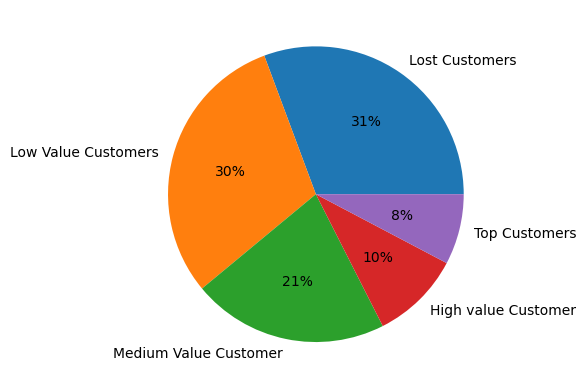

In [20]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [21]:
# new analysis
rfm = rfm1_df
rfm['recency_score'] = pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])

rfm['frequency_score'] = pd.qcut(rfm['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])

rfm['monetary_score'] = pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5])

rfm['RFM_SCORE'] = (rfm['recency_score'].astype(str)+ rfm['frequency_score'].astype(str))

In [22]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,13890,0,110,1883.81,100.0,78.345845,78.345845,4.079698,5,4,4,54,champions
1,13426,0,157,3641.32,100.0,86.034170,86.034170,4.406452,5,5,5,55,champions
2,17428,0,319,16903.85,100.0,95.288636,95.288636,4.799767,5,5,5,55,champions
3,13599,0,230,4800.83,100.0,91.962206,91.962206,4.658394,5,5,5,55,champions
4,16688,0,62,1260.86,100.0,62.658556,62.658556,3.412989,5,4,4,54,champions


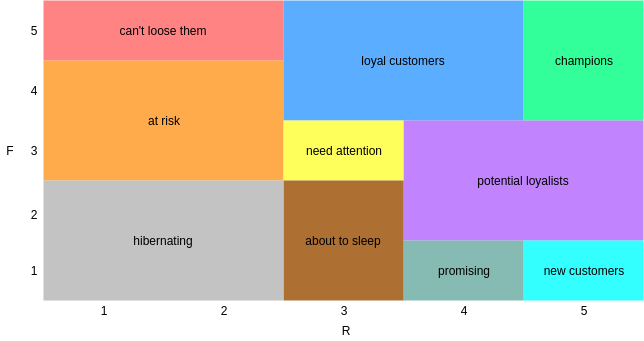

In [23]:
rfm[['Recency','Monetary','Frequency','segment']].groupby('segment').agg({'mean','std','max','min'})

Recency                              Monetary  \
                        max        std min        mean        max   
segment                                                             
about_to_sleep           68  10.271208  32   50.202206    6933.30   
at_Risk                 364  78.753108  69  159.312500    6115.01   
cant_loose              337  67.488237  69  132.905405   10254.18   
champions                11   3.623145   0    4.726930  233736.93   
hibernating             365  84.512799  69  196.195745   77183.60   
loyal_customers          68  15.253263  12   31.932065   76753.32   
need_attention           68  10.503640  32   48.847826   11581.80   
new_customers            10   3.339747   0    5.632653  168472.50   
potential_loyalists      31   9.042881   0   14.742794   26879.04   
promising                31   5.535314  13   21.826531    6748.80   

                                                       Frequency              \
                              std     min         mean       max         std   
segment                                                                        
about_to_sleep         614.330213    6.20   437.298088        28    7.810649   
at_Risk                759.918825   67.23   890.403542       116   21.702044   
cant_loose            1625.886007  411.53  2175.344608       543   74.532805   
champions            15993.475499  190.19  6155.484030      7707  498.437562   
hibernating           3207.029855    3.75   540.761268        28    7.757713   
loyal_customers       3950.035024  155.37  2375.223003      1204  118.908915   
need_attention        1010.837593   97.97   779.537234        56    8.140917   
new_customers        24049.366740   15.00  4032.191020        13    3.818813   
potential_loyalists   1880.108031   68.84   881.802395        57   12.632402   
promising              816.132511    0.00   454.843163        13    3.607987   

                                      
                     min        mean  
segment                               
about_to_sleep         1   15.110294  
at_Risk               29   54.520833  
cant_loose           117  179.364865  
champions             58  280.679849  
hibernating            1   13.001064  
loyal_customers       57  151.422554  
need_attention        29   40.402174  
new_customers          1    6.857143  
potential_loyalists   14   33.543237  
promising              1    7.153061

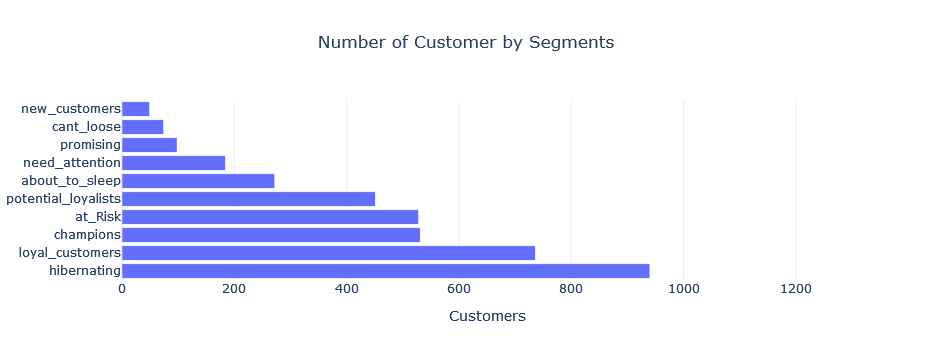

In [55]:
d = pd.DataFrame(rfm['segment'].value_counts()).reset_index()
data = go.Bar(y = d['segment'],
              x = d['count'],
              name = str(d['segment']),
              orientation='h')

layout = go.Layout(title={'text': "Number of Customer by Segments",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis =dict(title='Customers'),
                   template = 'plotly_white')

fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(range=[0,1300])
iplot(fig)

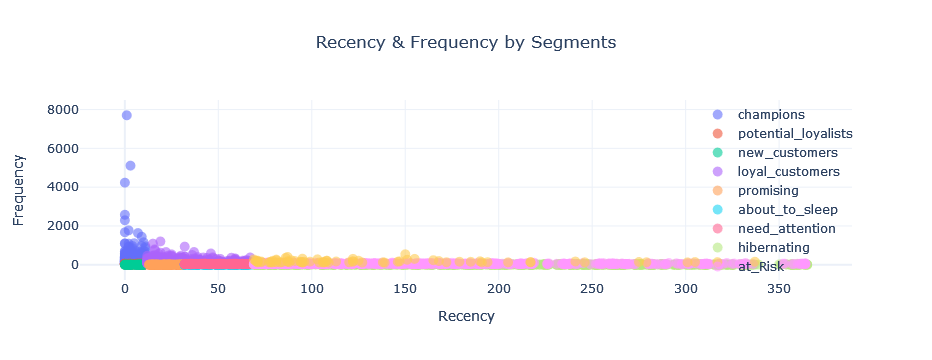

In [34]:
fig = go.Figure()
for i in rfm['segment'].unique():
    fig.add_trace(go.Scatter(x=rfm[rfm['segment']==i]['Recency'],
                           y=rfm[rfm['segment']==i]['Frequency'],
                           mode='markers', name=str(i),showlegend = True,
                           marker = dict(size = 10,opacity = 0.6)))

fig.update_layout(title={'text': "Recency & Frequency by Segments",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  legend=dict(x=0.8,
                              y=1,
                              bgcolor='rgba(255, 255, 255, 0)'),
                  xaxis = dict(title='Recency'),
                  yaxis=dict(title='Frequency'),
                  template='plotly_white')

fig.show()

In [35]:
import session_info
session_info.show(html=False)

-----
matplotlib          3.8.0
numpy               1.26.4
pandas              2.1.4
plotly              5.19.0
seaborn             0.13.2
session_info        1.0.0
-----
IPython             8.20.0
jupyter_client      8.6.0
jupyter_core        5.5.0
jupyterlab          4.0.11
notebook            7.0.8
-----
Python 3.11.8 | packaged by Anaconda, Inc. | (main, Feb 26 2024, 21:34:05) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.22631-SP0
-----
Session information updated at 2024-03-23 20:02
